# Aufgabe 1 - Simulationskette für Neutrinodetektor

In [2]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def phi(E):
    return 10/17*E**(-2.7)


def inverseCDFOfPhi(E):
    return (1-E)**(-10/17)


def P(E):
    return (1-np.exp(-E/2))**3

## Teilaufgabe a) - Signal MC

In [4]:
amountOfSamples = int(1e5)
np.random.seed = 42 # to get reproducable results
energyLinspace = np.linspace(1,10000,10000) # to plot the generated energy sample later on
prng = random.RandomState(42) # A mersenne twister generator
uniform1 = prng.uniform(size=amountOfSamples) # 1e5 pseudo random numbers, which are uniformly distributed in 0 to 1, 1 not included
energy = inverseCDFOfPhi(uniform1) # using inversion sampling
dfEnergy = pd.DataFrame(data=energy[0:], index=np.arange(0,amountOfSamples), columns=['Energy'])

In [5]:
#DataFrame.to_hdf('NeutrinoMC.hdf5', key='Energy', )

## Teilaufgabe b) - Akzeptanz

In [6]:
np.random.seed = 43 # change the seed to get different numbers
uniform2 = prng.uniform(size=amountOfSamples) # a second array to perform the neumann rejection sampling
mask = uniform2 < P(energy) # a boolean array containing true, false, true, ...
# at index i the value is true, if the neutrino with energy[i] got detected successfully, otherwise the value is false.
energyDetected = energy[mask == True] # In this array only the energies of the successfully detected neutrinos are stored
dfMask = pd.DataFrame(data=mask[0:], index=np.arange(0,amountOfSamples), columns=['AcceptanceMask'])
dfTwo = pd.concat([dfEnergy,dfMask], axis=1)

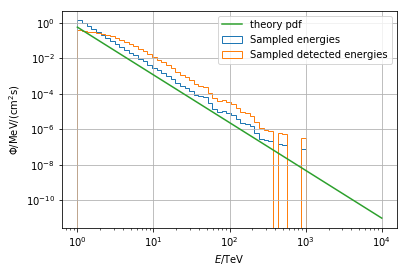

In [8]:
# Grafische Veranschaulichung
plt.hist(energy, normed=True, bins=np.logspace(0,3), label='Sampled energies', histtype='step')
plt.hist(energyDetected, normed=True, bins=np.logspace(0,3), label='Sampled detected energies', histtype='step')
plt.plot(energyLinspace, phi(energyLinspace), label='theory pdf')
plt.grid()
plt.legend()
plt.xlabel(r'$E/\mathrm{TeV}$')
plt.ylabel(r'$\Phi/\mathrm{MeV/(cm^2 s)}$')
plt.yscale('log')
plt.xscale('log')
plt.show()
plt.clf()

## Teilaufgabe c) - Energiemessung

In [30]:
def gaussian(x, mu, sig):
    return np.exp(-(x-mu)**2/(2*sig*sig) )/ np.sqrt(2*np.pi*sig*sig)

np.random.seed = 44
numberOfHits = []
i = 0
while i < 1e5:
    v1 = prng.uniform(-1,1)
    v2 = prng.uniform(-1,1)
    s = v1**2+v2**2
    if s < 1:
        temp = np.sqrt(-2/s*np.log(s)) # we need this twice later so we calculate it beforehand
        n1 = 2*energy[i]*v1*temp+10*energy[i] # Applying a linear transformation to the standard normal distribution
        n2 = 2*energy[i+1]*v2*temp+10*energy[i+1] # If x ~ N(0,1), then x'=sig*x+mu and x' is distributed with
        # standard distribution sig and mean mu.
        n1 = np.round(n1) # only a whole number of hits is possible
        n2 = np.round(n2)
        if n1 > 0: # only a positive number of hits is possible
            numberOfHits.append(n1)
            i += 1
        if n2 > 0:
            numberOfHits.append(n2)
            i += 1
dfHits = pd.DataFrame(data=numberOfHits[0:], index=np.arange(0,amountOfSamples), columns=['NumberOfHits'])
dfThree = pd.concat([dfTwo,dfHits], axis=1)
print(dfThree)

          Energy  AcceptanceMask  NumberOfHits
0       1.317901           False          13.0
1       5.874727            True          57.0
2       2.169629           False          19.0
3       1.710909           False          17.0
4       1.104927           False          11.0
5       1.104908           False          13.0
6       1.035826           False          10.0
7       3.264403           False          29.0
8       1.717100           False          11.0
9       2.063214           False          19.0
10      1.012310            True          12.0
11      7.853161            True         105.0
12      2.860055            True          33.0
13      1.150739           False           9.0
14      1.125296           False          11.0
15      1.126576           False          13.0
16      1.237861           False          12.0
17      1.548992           False          15.0
18      1.394685           False          14.0
19      1.224441           False          11.0
20      1.744